# Multi-Class Classification (Optional)

## Lecture Learning Objectives 

- Explain components of a confusion matrix with respect to multi-class classification.
- Define precision, recall, and f1-score with multi-class classification
- Carry out multi-class classification using OVR and OVO strategies.

## Five Minute Recap/ Lightning Questions 

- What metrics is calculated using the equation $\frac{TP}{TP + FP}$ ?
- What function can be used to find the calculated values of precision, recall, and f1? 
- What function do we use to identify the number of false positives, false negatives and correctly identified positive and negative values? 
- What argument/parameter is important to use when we make our own scorer where lower values are better? 
- What regression metric will give funky units? 

### Some lingering questions

- What happens if we have data where there is a lot of one class and very few of another?
- How do we measure precision and recall and what do our confusion matrices look like now

## Multi-class classification

- Often we will come across problems where there are more than two classes to predict.
- We call these multi-class problems.

- Some algorithms can natively support multi-class classification, for example:
    - Decision Trees
    - $K$-nn
    - Naive Bayes
- Below is an example of a Decision Tree Classifier used to classify 3 labels

<img src='imgs/multi_class_dt.png' width="60%">

And here's the graph:

<img src='imgs/multi_class_dt_graph.png' width="450">

- Here's an example of KNN:

<img src='imgs/multi_class_knn.png' width="550">

Other models, like SVMs and Logistic Regression, don't natively support multi-class classification.

Instead, there are two common strategies to help us:
- One-vs-rest
 - One-vs-one

### One-vs-Rest
(also known as one-vs-all)

- It's the default for most sklearn algorithms, e.g., LogisticRegression, SVM.
- Turns $k$-class classification into $k$ binary classification problems.
- Builds $k$ binary classifiers; for each classifier, the class is fitted against all the other classes.
- For *k* classes, that means we need *k* models in total, e.g.:
    - blue vs (red & orange)
    - red vs (blue & orange)
    - orange vs (blue & red)
- We use all models to make a prediction, and then choose the category with the highest prediction/probability/confidence.
- You can do this yourself for any binary classifier using [`OneVsRestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

Here we are importing `OneVsRestClassifier` from `sklearn.multiclass`

In [1]:
from sklearn.multiclass import OneVsRestClassifier

We are going to use a wine dataset that has 3 different classes; 0, 1, 2 (maybe red, white and rose?)

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_wine()
X = pd.DataFrame(data['data'], columns=data["feature_names"])
X = X[['alcohol', 'malic_acid']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
X_train.head()

alcohol  malic_acid
36     13.28        1.64
77     11.84        2.89
131    12.88        2.99
159    13.48        1.67
4      13.24        2.59

In [3]:
pd.DataFrame(y_train).value_counts()

1    54
0    40
2    39
dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression

ovr = OneVsRestClassifier(LogisticRegression(max_iter=100000))
ovr.fit(X_train, y_train)
ovr.score(X_train, y_train)

0.7819548872180451

/home/joel/miniconda3/envs/bait/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/joel/miniconda3/envs/bait/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/joel/miniconda3/envs/bait/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/joel/miniconda3/envs/bait/lib/python3.9/site-packages/plot_classifier/__init__.py:122: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X0[y==labels[2]], X1[y==labels[2]], s=60, c='k', marker='x', edgecolors='k')


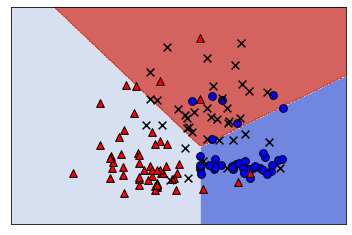

In [5]:
from plot_classifier import plot_classifier


plot_classifier(X_train, y_train, ovr);

### One-vs-One

- One-vs-One fits a model to all pairs of categories.
- If there are 3 classes ("blue", "red", "orange"), we fit a model on:
    - blue vs red
    - blue vs orange
    - red vs orange
- So we have 3 models in this case, or in general $\frac{n*(n-1)}{2}$
- For 100 classes, we fit 4950 models!
- All models are used during prediction and the classification with the most “votes” is predicted.
- Computationally expensive, but can be good for models that scale poorly with data, because each model in OvO only uses a fraction of the dataset.

In [6]:
from sklearn.multiclass import OneVsOneClassifier

In [7]:
ovo = OneVsOneClassifier(LogisticRegression(max_iter=100000))
ovo.fit(X_train, y_train)
ovo.score(X_train, y_train)

0.8120300751879699

/home/joel/miniconda3/envs/bait/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(
/home/joel/miniconda3/envs/bait/lib/python3.9/site-packages/plot_classifier/__init__.py:122: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X0[y==labels[2]], X1[y==labels[2]], s=60, c='k', marker='x', edgecolors='k')


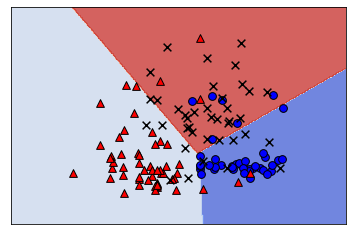

In [8]:
plot_classifier(X_train, y_train, ovo);

## Multi-class measurements

Similar to how we can use different classification metrics for binary classification, we can do so with multi-class too. 

Let's look at this with a larger version of this wine dataset. 

In [9]:
data = datasets.load_wine()
X = pd.DataFrame(data['data'], columns=data["feature_names"])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
X_train.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
36     13.28        1.64  2.84               15.5      110.0           2.60   
77     11.84        2.89  2.23               18.0      112.0           1.72   
131    12.88        2.99  2.40               20.0      104.0           1.30   
159    13.48        1.67  2.64               22.5       89.0           2.60   
4      13.24        2.59  2.87               21.0      118.0           2.80   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
36         2.68                  0.34             1.36             4.60  1.09   
77         1.32                  0.43             0.95             2.65  0.96   
131        1.22                  0.24             0.83             5.40  0.74   
159        1.10                  0.52             2.29            11.75  0.57   
4          2.69                  0.39             1.82             4.32  1.04   

     od280/od315_of_diluted_wines  proline  
36                           2.78    880.0  
77                           2.52    500.0  
131                          1.42    530.0  
159                          1.78    620.0  
4                            2.93    735.0

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 36 to 116
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       133 non-null    float64
 1   malic_acid                    133 non-null    float64
 2   ash                           133 non-null    float64
 3   alcalinity_of_ash             133 non-null    float64
 4   magnesium                     133 non-null    float64
 5   total_phenols                 133 non-null    float64
 6   flavanoids                    133 non-null    float64
 7   nonflavanoid_phenols          133 non-null    float64
 8   proanthocyanins               133 non-null    float64
 9   color_intensity               133 non-null    float64
 10  hue                           133 non-null    float64
 11  od280/od315_of_diluted_wines  133 non-null    float64
 12  proline                       133 non-null    float64
dtypes: f

Since our data here isn't missing any values and it's all numeric, we can make a pipeline with just `StandardScaler()` and a model, we are going to use `LogisticRegression`.

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(
    (StandardScaler()),
    (LogisticRegression())
)
pipe.fit(X_train,y_train);

In [12]:
predictions = pipe.predict(X_test)
pipe.score(X_test,y_test)

0.9333333333333333

We can predict on our test set and see that we get an accuracy of 93%. 

But what does this mean for our metrics?

### Multiclass confusion metrics

We can still create confusion matrices but now they are greater than a 2 X 2 grid. 

We have 3 classes for this data, so our confusion matrix is 3 X 3. 

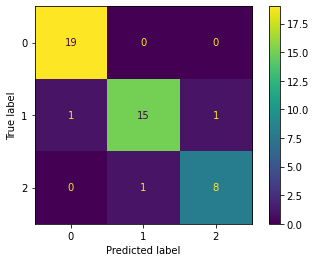

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(
    pipe,
    X_test,
    y_test
);

We see that we can still compute a confusion matrix, for problems with more than 2 labels in the target column. 

The diagonal values are the correctly labelled wines and the rest are the errors.

Here we can see the model mistakenly predicted:

- 1 wine of true class 1 as class 0 and,
- 1 wine of true class 1 as class 2. 
- 1 of the wines with a class of 2 as class 1. 

### Multiclass classification report

Precision, recall, etc. don't apply directly but like we said before, but depending on which class we specify as our "positive" label and consider the rest to be negative, then we can.

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9500    1.0000    0.9744        19
           1     0.9375    0.8824    0.9091        17
           2     0.8889    0.8889    0.8889         9

    accuracy                         0.9333        45
   macro avg     0.9255    0.9237    0.9241        45
weighted avg     0.9331    0.9333    0.9326        45



If class `0` is our positive class then our precision, recall and f1-scores are 0.95, 1.00, 0.9744 respectively. 

If class `1` is our positive class then now the precision, recall and f1-scores are 0.9375, 0.8824, 0.9091. 

And finally, if class `2` is our positive class then the precision, recall and f1-scores are 0.8889, 0.8889, 0.8889. 

Again the `support` column on the right shows the number of examples of each wine class. 

## Multi-class coefficients 

Let's look at the coefficients with this multi-class problem. (Ignore the `max_iter` for now. You can look into it [here](https://medium.com/analytics-vidhya/a-complete-understanding-of-how-the-logistic-regression-can-perform-classification-a8e951d31c76) if you like)

In [15]:
pipe.named_steps['logisticregression'].coef_

array([[ 0.65224456,  0.15226257,  0.39849154, -0.65779374,  0.14809695,
         0.40339704,  0.64196157, -0.17781306, -0.08015819,  0.14511694,
         0.10843067,  0.57387779,  1.04929389],
       [-0.98152274, -0.46358731, -0.72783023,  0.39233462, -0.37572384,
        -0.12216444,  0.26882969,  0.28402296,  0.57145264, -0.7940844 ,
         0.64433443,  0.0136787 , -1.02136195],
       [ 0.32927817,  0.31132474,  0.32933868,  0.26545912,  0.22762689,
        -0.2812326 , -0.91079126, -0.1062099 , -0.49129445,  0.64896746,
        -0.75276509, -0.58755649, -0.02793194]])

In [16]:
pipe.named_steps['logisticregression'].coef_.shape

(3, 13)

What is going on here?

Well, now we have one coefficient per feature *per class*.

The interpretation is that these coefficients contribute to the prediction of a certain class. 

The specific interpretation depends on the way the logistic regression is implementing multi-class (OVO, OVR).

## Multi-class and `predict_proba` 

If we look at the output of `predict_proba` you'll also see that there is a probability for each class and each row adds up to 1 as we would expect (total probability = 1).

In [17]:
pipe.predict_proba(X_test)[:5]

array([[9.93054789e-01, 6.37825640e-03, 5.66954156e-04],
       [8.88767485e-04, 9.91007367e-01, 8.10386504e-03],
       [9.99631873e-01, 2.80846843e-04, 8.72802725e-05],
       [4.31126532e-04, 3.74655335e-04, 9.99194218e-01],
       [1.36846522e-03, 9.97552882e-01, 1.07865245e-03]])

## Let's Practice 

1\. Which wrapper is more computationally expensive?    
2\. Name a model that can handle multi-class problems without any issues or needing any additional strategies.    
3\. If I have 6 classes, how many models will be built if I use the One-vs-Rest strategy?    
4\. If I have 6 classes, how many models will be built if I use the One-vs-One strategy?    

Use the diagram below to answer the next few questions:    
<img src="imgs/multi-classQ.png"  width = "70%" alt="404 image" />

5\. How many examples did the model correctly predict?     
6\. How many examples were incorrectly labelled as `G`?    
7\. How many `F-C` labels were in the data?     

**True or False:**      

8\. Decision Trees use coefficients for multi-class data.      
9\. Using 1 target label as the positive class will make all other target labels negative.   

```{admonition} Solutions!
:class: dropdown

1. One-vs-One
2. Decision Trees, K-nn
3. 6
4. $6(5)/2=15$
5. 52
6. 3
7. 6 
8. False
9. True

```

## Pandas Profiler 

- EDA secret! (Careful to only use this on your training split though -> Golden Rule!) 
- quickly generate summaries of dataframes including dtypes, stats, visuals, etc.
- [Pandas profiling](https://github.com/pandas-profiling/pandas-profiling) is not part of base Pandas
- If using conda, install with: `pip install pandas-profiling`

In [18]:
from pandas_profiling import ProfileReport

In [19]:
df = pd.read_csv('data/housing.csv')

In [20]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## What We've Learned Today

- How to carry out multi-class classification.
- How to utilize pandas profiling for EDA. 